In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [15]:
datasetPath = "data-quiz.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

In [16]:
k = 2
iterationCounter = 0
input = dataset

In [17]:
def initCentroid(dataIn, k):
  result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
  return result

In [18]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("figure")
    plt.clf()
    plt.title("iteration-" + iteration)
    marker = itertools.cycle(('.', '*', '^', 'x', '+'))
    for i in range(n):
      col = next(color)
      memberCluster = np.asmatrix(listClusterMembers[i])
      plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]),
                  marker=marker.__next__(), s=100, c=col, label="klaster-"+str(i+1))
    for i in range(n):
      plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker=marker.__next__(),
                  c=col, label="centroid-" + str(i + 1))

    if (converged == 0):
      plt.legend()
      plt.ion()
      plt.show()
      plt.pause(0.1)
    if (converged == 1):
      plt.legend()
      plt.show(block=True)

In [19]:
def kMeans (data, centroidInit):
  nCluster = k
  global iterationCounter
  centroidInit = np.matrix(centroidInit)

  while (True):
    iterationCounter += 1
    euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))

    for i in range (0, nCluster):
      centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
      deltaMatrix = abs(np.subtract(data, centroidRepeated))

      euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
      euclideanMatrixAllCluster = \
      np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)

    clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
    listClusterMember = [[] for i in range(k)]
    for i in range(0, data.shape[0]):
      listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
    
    newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
    for i in range(0, nCluster):
      memberCluster = np.asmatrix(listClusterMember[i])
      centroidCluster = memberCluster.mean(axis=0)
      newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
    print("iter: ",iterationCounter)
    print("centroid: ",newCentroid)

    if((centroidInit == newCentroid).all()):
      break

    centroidInit = newCentroid

    plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
    time.sleep(1)
  return listClusterMember, centroidInit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument o

iter:  1
centroid:  [[3.3  4.32]
 [6.25 4.35]]


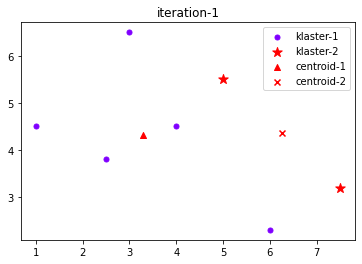

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


iter:  2
centroid:  [[2.625      4.825     ]
 [6.16666667 3.66666667]]


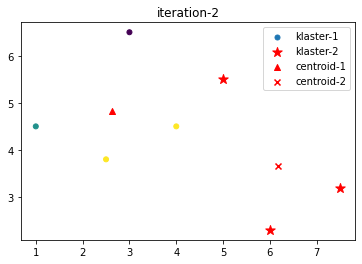

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


iter:  3
centroid:  [[2.625      4.825     ]
 [6.16666667 3.66666667]]


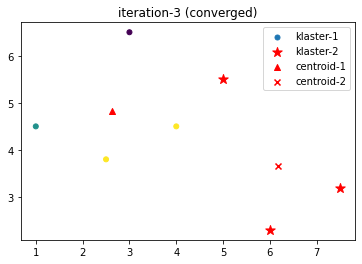

In [20]:
centroidInit = initCentroid(input, k)
clusterResults, centroid = kMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter)+" (converged)", 1)